In [1]:
#!pip install -U torch torchvision torchtext torchdata pytest torchsummary portalocker

### Import libraries

In [2]:
from data_chatbot import questions_answers, load_df, toTensor, show_lengths, tokenize_questions,tokenize_answers
from data_chatbot import pretrained_w2v, prepare_text
from models_chatbot import Seq2Seq
from vocab_chatbot import Vocab


from train_chatbot import pretrain, train
from apply_chatbot import apply_chatbot



### Tests

In [3]:
!python -m pytest -vv tests_chatbot.py

============================= test session starts =============================
platform win32 -- Python 3.9.12, pytest-7.4.0, pluggy-1.0.0 -- C:\ProgramData\Anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\adgryc\Desktop\Udacity\GitHub Projects\chatbot
plugins: anyio-3.5.0
collecting ... collected 2 items

tests_chatbot.py::test_seq2seq_forward FAILED                            [ 50%]
tests_chatbot.py::test_heteroDataLoader FAILED                           [100%]

================================== FAILURES ===================================
____________________________ test_seq2seq_forward _____________________________

question = tensor([1, 2, 3]), answer = tensor([2, 4, 6])
vocab_source = <vocab_chatbot.Vocab object at 0x000001E152B46340>
vocab_target = <vocab_chatbot.Vocab object at 0x000001E152B46430>

    def test_seq2seq_forward(question, answer, vocab_source, vocab_target):
        # test training mode
>       model = Seq2Seq(5, 3, 8, vocab_source, vocab_target,

### Raw data

In [4]:
# source_name = "poc"
source_name = "squad1"

In [5]:
df_train = load_df(source_name=source_name)
df_train.head()

C:\Users\adgryc\Desktop\Udacity\GitHub Projects\chatbot\data_chatbot.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train.append(df_test)


,Question,Answer
0,To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous
1,What is in front of the Notre Dame Main Building?,a copper statue of Christ
2,The Basilica of the Sacred heart at Notre Dame...,the Main Building
3,What is the Grotto at Notre Dame?,a Marian place of prayer and reflection
4,What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary


In [6]:
len(df_train)

87599

### Tokenized sentences

C:\Users\adgryc\Desktop\Udacity\GitHub Projects\chatbot\data_chatbot.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train.append(df_test)


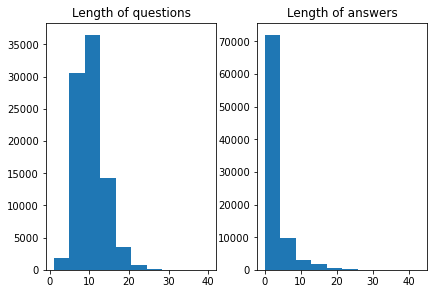

In [7]:
questions_train_raw, questions_valid_raw, answers_train_raw, answers_valid_raw = questions_answers(source_name=source_name)
show_lengths(questions_train_raw, questions_valid_raw, answers_train_raw, answers_valid_raw)

### Filter data

In [8]:
# a desicion has to be made between the next and the after next block

In [9]:
# temp = [pair for pair in zip(questions_train_raw, answers_train_raw) if len(pair[1])>3]
# questions_train_filt, answers_train_filt = map(list, zip(*temp))
# temp = [pair for pair in zip(questions_valid_raw, answers_valid_raw) if len(pair[1])>3]
# questions_valid_filt, answers_valid_filt = map(list, zip(*temp))
# print(f"{len(questions_train_filt)} training questions and {len(questions_valid_filt)} valid questions remain.")

In [10]:
questions_train_filt = questions_train_raw[:5000]
questions_valid_filt = questions_valid_raw[4501:5000]
answers_train_filt = answers_train_raw[:5000]
answers_valid_filt = answers_valid_raw[4501:5000]

### Create vocabularies

In [11]:
vQ = Vocab("Questions")
for sequence in [["<SOS>", "<EOS>"]] + questions_train_filt + questions_valid_filt:
    for token in sequence:
        vQ.indexWord(token)
vA = Vocab("Answers")
for sequence in [["<SOS>", "<EOS>"]] + answers_train_filt + answers_valid_filt:
    for token in sequence:
        vA.indexWord(token)
print(f"The source vocabulary contains {len(vQ.word2index)} and the target vocabulary contains {len(vA.word2index)} words.")

The source vocabulary contains 4797 and the target vocabulary contains 4564 words.


### Create vectors

In [12]:
questions_train = tokenize_questions(questions_train_filt, vQ)
answers_train = tokenize_answers(answers_train_filt, vA)
questions_valid = tokenize_questions(questions_valid_filt, vQ)
answers_valid = tokenize_answers(answers_valid_filt, vA)

### Create model

In [13]:
input_size = len(vQ.word2index)
hidden_size = 124
output_size = len(vA.word2index) 

dropout_E=0.0
dropout_D=0.0
teacher_forcing_ratio=0.0


model = Seq2Seq(input_size, hidden_size, output_size)

### Utilize pretrained embeddings

In [14]:
# w2v = pretrained_w2v(init=False)
# model = pretrain(model, vQ, vA, w2v)

#### => most_similar is not working after adding vector in gensim

### Train model

In [15]:
epochs = 50
batch_size = 124
print_each = 5
lr = 0.01
weight_decay = 0
version = str(hidden_size)
train(epochs, batch_size, print_each, lr, model, version, questions_train, answers_train, vQ, vA)

Nothing to load at checkpoint: 'model_124.pt'
Computing on cpu.

epoch: 5/50 	train_loss: 3.677 	valid_loss 5.182
question: <SOS> when did beyonc start becom popular <EOS> 
answer: in the late 1990 <EOS> 
prediction: the ming <EOS> the mongol 
epoch: 10/50 	train_loss: 3.062 	valid_loss 5.129
question: <SOS> emmett till death spark which polit movement in the 50 <EOS> 
answer: civil right movement <EOS> 
prediction: the mongol <EOS> the 
epoch: 15/50 	train_loss: 2.363 	valid_loss 5.273
question: <SOS> one of the biggest fashion show in the world is name what in new york <EOS> 
answer: new york fashion week <EOS> 
prediction: new york citi depart of 
epoch: 20/50 	train_loss: 1.715 	valid_loss 4.666
question: <SOS> the central of intent broaden what definit beyond the 1948 one <EOS> 
answer: group ident <EOS> 
prediction: the new york 
epoch: 25/50 	train_loss: 1.174 	valid_loss 3.486
question: <SOS> beyonc father work as a sale manag for what compani <EOS> 
answer: xerox <EOS> 
predic

In [16]:
import torch
#version = 124
model.load_state_dict(torch.load(f"model_{version}.pt", map_location=torch.device('cpu')))
print(f"Loading from checkpoint: 'model_{version}.pt'")


max_count = 0
for answer in answers_train:
    if len(answer) > max_count:
        max_count = len(answer)

model.eval()
print("Type 'end' to finish the chat.\n'")

    
while (True):
    question = input("> ")
    if question.strip() == "end":
        break
    
    apply_chatbot(model, tokenize_questions([prepare_text(question)],vQ)[0].view(-1,1), vQ, vA, max_count)

Loading from checkpoint: 'model_124.pt'
Type 'end' to finish the chat.
'
> What is in front of the Notre Dame Main Building?
question: <SOS>
predicted_answer: a copper statu of christ <EOS>

> What is the Grotto at Notre Dame?	
question: <SOS>
predicted_answer: a marian place of prayer and reflect <EOS>

> end
